In [25]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os
from pathlib import Path
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [40]:
base_path = Path("/home/unix/wangyanz/codon_usage/star_ribo")
data_pool = base_path.joinpath("data")
tag = "RIBO_STAR_rep23"
star_ribo_data = data_pool.joinpath(f"{tag}.h5ad")
cell_type_pool = data_pool.joinpath("cell_type")
codon_usage_file = data_pool.joinpath(f"codon_frequence_{tag}.csv")
codon_usage_raw_file = data_pool.joinpath(f"codon_frequence_raw_{tag}.csv")
amino_acid_usage_file = data_pool.joinpath(f"amino_acid_composition_{tag}.csv")

In [50]:
codon_usage = pd.read_csv(codon_usage_file, index_col=0).iloc[:,-12:]
amino_acid_usage = pd.read_csv(amino_acid_usage_file, index_col=0).iloc[:,-12:]
codon_usage_raw = pd.read_csv(codon_usage_raw_file, index_col=0).iloc[:,:-1]


In [42]:
def PCA_trans(data):
    pca = PCA(n_components=2)
    pca.fit(data)
    codon_usage_pca = pca.transform(data)
    return codon_usage_pca


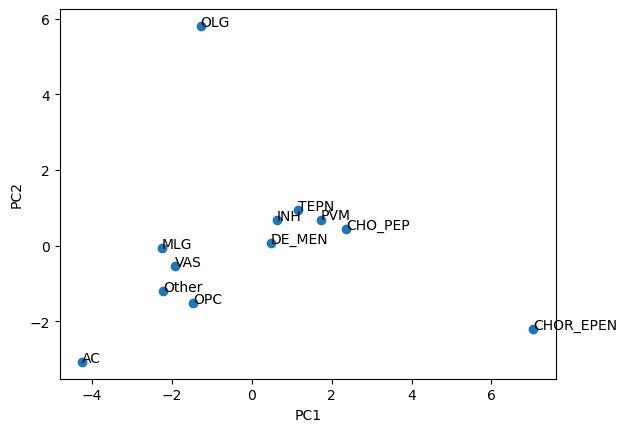

In [43]:
codon_usage_pca = PCA_trans(codon_usage.T)
plt.figure()
plt.scatter(codon_usage_pca[:,0], codon_usage_pca[:,1])
for idx, key in enumerate(codon_usage.keys()):
    plt.text(codon_usage_pca[idx,0], codon_usage_pca[idx,1], key)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

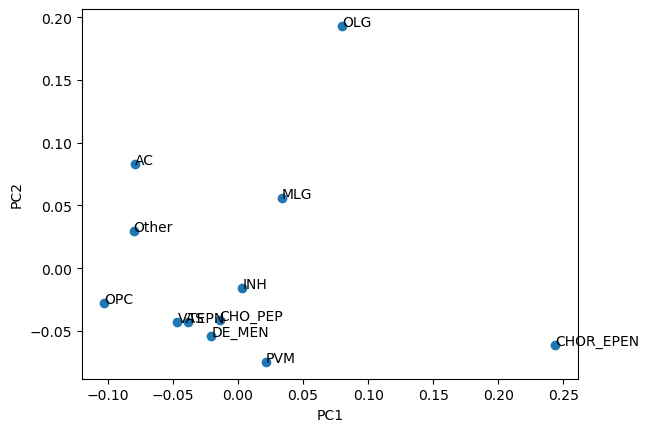

In [44]:
amino_acid_usage_pca = PCA_trans(amino_acid_usage.T)
plt.figure()
plt.scatter(amino_acid_usage_pca[:,0], amino_acid_usage_pca[:,1])
for idx, key in enumerate(codon_usage.keys()):
    plt.text(amino_acid_usage_pca[idx,0], amino_acid_usage_pca[idx,1], key)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

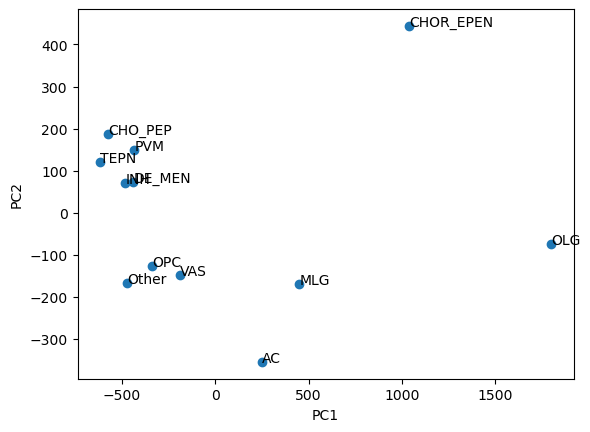

In [51]:
codon_usage_raw_pca = PCA_trans(codon_usage_raw.T)
plt.figure()
plt.scatter(codon_usage_raw_pca[:,0], codon_usage_raw_pca[:,1])
for idx, key in enumerate(codon_usage.keys()):
    plt.text(codon_usage_raw_pca[idx,0], codon_usage_raw_pca[idx,1], key)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [52]:
codon_usage_raw

,Other,TEPN,OPC,CHO_PEP,INH,AC,MLG,PVM,CHOR_EPEN,VAS,OLG,DE_MEN
TTT,1886.987276,1963.862642,1875.761551,1958.075762,1946.822961,1803.331974,1824.294732,1943.637863,1858.302395,1849.920638,1747.429059,1924.236473
TTC,2718.810954,2745.997196,2697.648664,2732.599804,2751.420854,2676.043751,2634.952535,2722.485785,2544.749348,2677.453564,2374.678813,2750.301391
TTA,634.948731,687.031966,641.834259,681.209785,667.158033,595.706158,610.638642,671.687667,647.211832,617.423914,602.797487,657.260784
TTG,1543.399052,1581.311527,1535.104220,1592.554698,1562.580503,1451.146060,1468.437993,1583.880476,1471.887702,1522.989792,1335.118613,1568.092797
TCT,1963.917555,1988.693955,1932.991441,2006.451219,1976.686736,1851.243030,1853.026000,1980.902201,1922.384124,1914.918666,1738.984901,1984.688449
...,...,...,...,...,...,...,...,...,...,...,...,...
GGA,2170.992215,2212.857776,2164.289928,2241.067557,2205.999724,2072.207403,2062.113354,2234.490418,2171.589606,2156.785058,1942.347903,2206.086414
GGG,2066.677006,2064.464113,2056.832637,2058.372194,2039.457765,2023.847063,1943.731594,2051.101956,1867.735965,2013.460985,1779.672762,2063.270254
TAA,87.201082,88.843420,85.014571,88.056904,89.467820,85.078494,88.553835,87.906448,81.891153,87.719769,97.319239,88.350086
TAG,46.271828,48.495704,49.183214,47.913109,47.970823,46.227018,46.930218,49.107845,47.310828,48.076862,44.701359,48.424264
